# Projet HUT
## Analyse des données

### Objectifs

- Visualiser des données : observation du comportement des données, défauts et erreurs des capteurs
- Apporter des données quantifiées quant à la fréquence d'utilisation, le temps d'utilisation, la détection de pattern c'est-à-dire les plages d'utilisation
- Appuyer des arguments quant à des enchaînements d'utilisations c'est-à-dire des scénarios

#### Description de la trame de code

> Visualisation des données
>> Importation des packages nécessaires pour l'analyse
>> Utilisation des fichiers de données CSV
>> Normalisation des données
>> Affichage graphique

> Etude de l'activité "regarder la télé" selon les capteurs du canapé et de la lumière de la télé
>> Récupération des données selon l'état d'activité "en marche"
>> Concordance des moments d'utilisation des deux capteurs
>> Mise à jour des plages pour retirer les "défauts" des capteurs.

> Etude de l'activité "dormir dans le lit"


### Visualisation des données

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
path11 = "C:/Users/carol/Downloads/split_sensor/split_sensor/split_sensor_int5891_1min.csv"
path22 = "C:/Users/carol/Downloads/split_sensor/split_sensor/split_sensor_int6127_1min.csv"
path33 = "C:/Users/carol/Downloads/split_sensor/split_sensor/split_sensor_int5889_1min.csv"
dfdf = pd.read_csv(path11)
df_bisdf_bis = pd.read_csv(path22)
df_3df_3 = pd.read_csv(path33)

In [3]:
nb_donnee_par_jour = 60 * 24
nb_donnee_par_sem = nb_donnee_par_jour * 7
#start = nb_donnee_par_jour * 2
start=0

In [4]:
df2 = dfdf[start:start + nb_donnee_par_sem]
df_bis2 = df_bisdf_bis[start:start + nb_donnee_par_sem]
df_3_2 = df_3df_3[start:start + nb_donnee_par_sem]

In [5]:
def normalize(df):
    result = df.copy()
    max_value = df["value"].max()
    min_value = df["value"].min()
    result["value"] = (df["value"] - min_value) / (max_value - min_value)
    return result

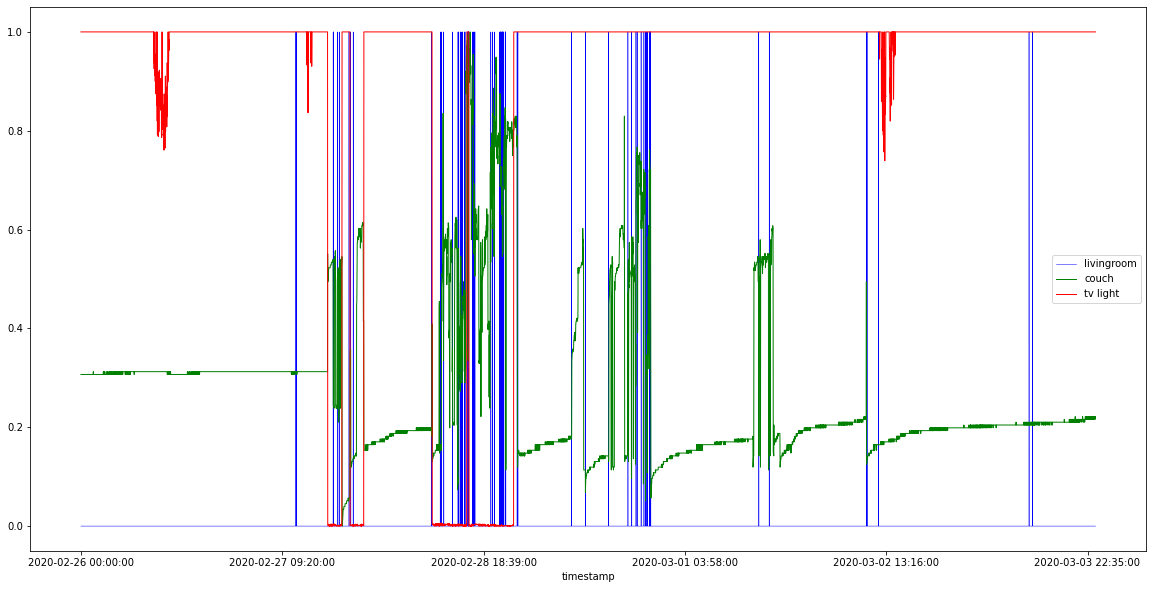

In [6]:
ax = df2.plot(x='timestamp', y='value', color='blue', label='livingroom', linewidth='0.5', figsize=(20,10))
# ax = df_3_2.plot(x='timestamp', y='value', color='green',label='bathroom', linewidth='0.5')
# ax = df_bis2.plot(x='timestamp', y='value', color='red',label='corridor', linewidth='0.5')
# df2.plot(x='timestamp', y='value', color='blue', label='bathroom', linewidth='0.5', ax=ax)
normalize(df_3_2).plot(x='timestamp', y='value', color='green', label='couch', linewidth='1', ax=ax, figsize=(20,10))
# plt.plot(x='timestamp', y='value', color='blue', label='livingroom', linewidth='0.5', data=df2)
normalize(df_bis2).plot(x='timestamp', y='value', color='red', label='tv light', linewidth='1', ax=ax, figsize=(20,10))
# df_bis2.plot(x='timestamp', y='value', color='red',label='corridor', linewidth='0.5', ax=ax)
# df_3_2.plot(x='timestamp', y='value', color='green',label='bathroom', linewidth='0.5', ax=ax)
plt.show()

## Conclusion de cette partie

Des erreurs pour les capteurs ont pu être observées, notamment pour les capteurs de mouvement tels que dans la salle de bain ou la cuisine à partir du 2020-03-18.
Choix : étude des données sur la période du 2020-02-26 au 2020-03-17
--> Ceci est à confirmer et à adapter selon les données récoltées pour chaque capteur, si celles-ci sont suffisantes pour une analyse. Dans le cas contraire, nous allongerons la période d'étude pour l'analyse et déceler des patterns par exemple.

### Etude de l'activité : "regarder la télé"

Utilisation des capteurs suivants :
- Capteur de pression du canapé (réf : P01 - 5889)
- Capteur de lumière de la télé (réf : L01 - 6127)
- Capteur de mouvement de la pièce (livingroom) (réf : M02 - 5891)

#### Problèmes relevés dans cette partie

La plage du 2020-02-26 au 2020-03-17 n'est pas suffisante pour l'étude de ce capteur. Il faut donc allongé la plage jusqu'au 2020-06-01 (passé cette date, on décèle un comportement anormal du capteur de pression du canapé).

En cours de résolution :
- Pour la fonction "rétablir_plages_regarder_tv", il y a un problème concernant le format de date pour la conversion des chaînes de caractères en objet datetime, notamment lorsque les écarts entre les plages d'utilisation dépasse la journée (en durée).

Choix :
- Dans un premier temps, il a été envisagé de travailler aussi avec le capteur de mouvement de la pièce concerné. Dans une première version, celui-ci n'a pas été étudié. Il le sera peut-être éventuellement dans une version ultérieure, non faite encore à ce jour.

<AxesSubplot:xlabel='timestamp'>

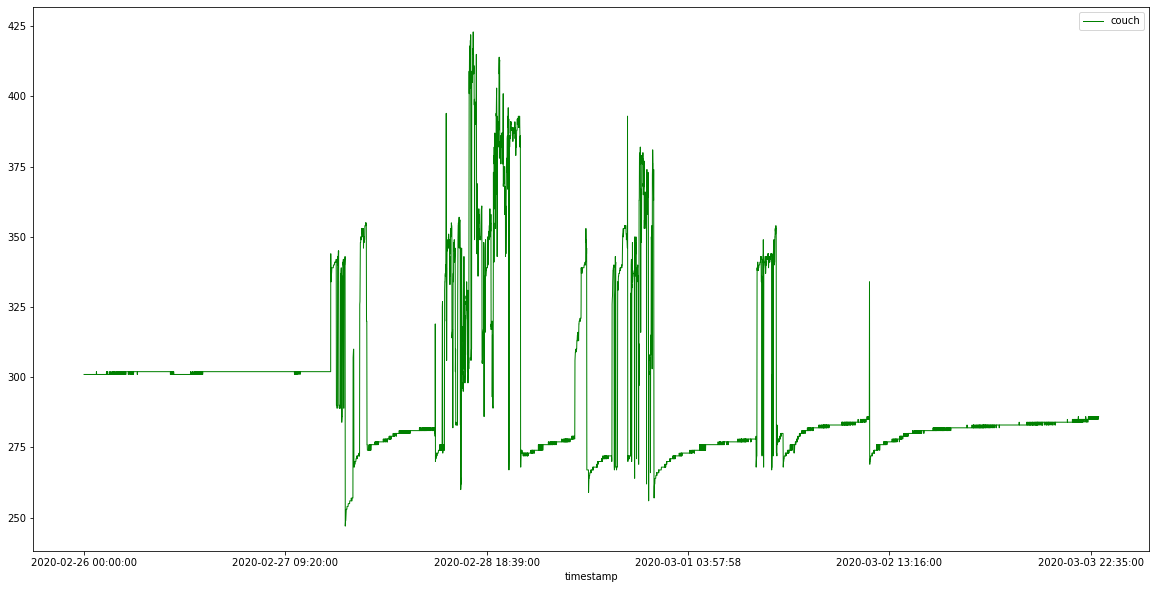

In [7]:
df_3_2.plot(x='timestamp', y='value', color='green', label='couch', linewidth='1',figsize=(20,10))

In [8]:
path1_1 = "C:/Users/carol/Downloads/split_sensor/split_sensor/split_sensor_int5891_1min.csv"
path2_2 = "C:/Users/carol/Downloads/split_sensor/split_sensor/split_sensor_int6127_1min.csv"
path3_3 = "C:/Users/carol/Downloads/split_sensor/split_sensor/split_sensor_int5889_1min.csv"
df_rgtv = pd.read_csv(path1_1)
df_bis_rgtv = pd.read_csv(path2_2)
df_3_rgtv = pd.read_csv(path3_3)

In [9]:
def get_couch_pressure(df):
    presence_canape_date = []
    presence_canape_heure = []
    #df = df_3_rgtv
    n = df.shape[0]
    for i in range (n) :
        if (df['value'][i] > 305) and (df['timestamp'][i] < '2020-06-01 23:59:00') :
            #and (df['timestamp'][i] < '2020-03-17 23:59:00') 
            #and (df['timestamp'][i] < '2020-06-01 23:59:00') 
            presence_canape_date.append(df['timestamp'][i][0:10])
            presence_canape_heure.append(df['timestamp'][i][11:19])
    #presence_canape_date=np.array([presence_canape_date])
    #presence_canape_heure=np.array([presence_canape_heure])

    presence_canape=[presence_canape_date, presence_canape_heure]
    #presence_canape = np.array(presence_canape)
    return presence_canape

In [10]:
get_couch_pressure(df_3_rgtv)

[['2020-02-27',
  '2020-02-27',
  '2020-02-27',
  '2020-02-27',
  '2020-02-27',
  '2020-02-27',
  '2020-02-27',
  '2020-02-27',
  '2020-02-27',
  '2020-02-27',
  '2020-02-27',
  '2020-02-27',
  '2020-02-27',
  '2020-02-27',
  '2020-02-27',
  '2020-02-27',
  '2020-02-27',
  '2020-02-27',
  '2020-02-27',
  '2020-02-27',
  '2020-02-27',
  '2020-02-27',
  '2020-02-27',
  '2020-02-27',
  '2020-02-27',
  '2020-02-27',
  '2020-02-27',
  '2020-02-27',
  '2020-02-27',
  '2020-02-27',
  '2020-02-27',
  '2020-02-27',
  '2020-02-27',
  '2020-02-27',
  '2020-02-27',
  '2020-02-27',
  '2020-02-27',
  '2020-02-27',
  '2020-02-27',
  '2020-02-27',
  '2020-02-27',
  '2020-02-27',
  '2020-02-27',
  '2020-02-27',
  '2020-02-27',
  '2020-02-27',
  '2020-02-27',
  '2020-02-27',
  '2020-02-27',
  '2020-02-27',
  '2020-02-27',
  '2020-02-27',
  '2020-02-27',
  '2020-02-27',
  '2020-02-27',
  '2020-02-27',
  '2020-02-27',
  '2020-02-27',
  '2020-02-27',
  '2020-02-27',
  '2020-02-27',
  '2020-02-27',
  '2020-

In [11]:
def get_tv_light(df):
    tv_allumee_date = []
    tv_allumee_heure = []
    #df = df_bis_rgtv
    n = df.shape[0]
    for i in range(n):
        if (df['value'][i] < 15) and (df['timestamp'][i] < '2020-03-17 23:59:00'):
            #and (df['timestamp'][i] < '2020-03-17 23:59:00') 
            tv_allumee_date.append(df['timestamp'][i][0:10])
            tv_allumee_heure.append(df['timestamp'][i][11:19])
            
    tv_allumee = [tv_allumee_date, tv_allumee_heure]
    return tv_allumee

In [12]:
get_tv_light(df_bis_rgtv)

[['2020-02-27',
  '2020-02-27',
  '2020-02-27',
  '2020-02-27',
  '2020-02-27',
  '2020-02-27',
  '2020-02-27',
  '2020-02-27',
  '2020-02-27',
  '2020-02-27',
  '2020-02-27',
  '2020-02-27',
  '2020-02-27',
  '2020-02-27',
  '2020-02-27',
  '2020-02-27',
  '2020-02-27',
  '2020-02-27',
  '2020-02-27',
  '2020-02-27',
  '2020-02-27',
  '2020-02-27',
  '2020-02-27',
  '2020-02-27',
  '2020-02-27',
  '2020-02-27',
  '2020-02-27',
  '2020-02-27',
  '2020-02-27',
  '2020-02-27',
  '2020-02-27',
  '2020-02-27',
  '2020-02-27',
  '2020-02-27',
  '2020-02-27',
  '2020-02-27',
  '2020-02-27',
  '2020-02-27',
  '2020-02-27',
  '2020-02-27',
  '2020-02-27',
  '2020-02-27',
  '2020-02-27',
  '2020-02-27',
  '2020-02-27',
  '2020-02-27',
  '2020-02-27',
  '2020-02-27',
  '2020-02-27',
  '2020-02-27',
  '2020-02-27',
  '2020-02-27',
  '2020-02-27',
  '2020-02-27',
  '2020-02-27',
  '2020-02-27',
  '2020-02-27',
  '2020-02-27',
  '2020-02-27',
  '2020-02-27',
  '2020-02-27',
  '2020-02-27',
  '2020-

In [13]:
def get_presence_livingroom(df):
    presence_livingroom_date = []
    presence_livingroom_heure = []
    #df = df_rgtv
    n = df.shape[0]
    for i in range(n) :
        if (df['value'][i] == 1) and (df['timestamp'][i] < '2020-03-17 23:59:00'):
            #and (df['timestamp'][i] < '2020-03-17 23:59:00') 
            #and (df['timestamp'][i] < '2020-06-01 23:59:00'
            presence_livingroom_date.append(df['timestamp'][i][0:10])
            presence_livingroom_heure.append(df['timestamp'][i][11:19])
    presence_livingroom = [presence_livingroom_date, presence_livingroom_heure]
    return presence_livingroom

In [14]:
get_presence_livingroom(df_rgtv)

[['2020-02-27',
  '2020-02-27',
  '2020-02-27',
  '2020-02-27',
  '2020-02-27',
  '2020-02-27',
  '2020-02-27',
  '2020-02-27',
  '2020-02-27',
  '2020-02-28',
  '2020-02-28',
  '2020-02-28',
  '2020-02-28',
  '2020-02-28',
  '2020-02-28',
  '2020-02-28',
  '2020-02-28',
  '2020-02-28',
  '2020-02-28',
  '2020-02-28',
  '2020-02-28',
  '2020-02-28',
  '2020-02-28',
  '2020-02-28',
  '2020-02-28',
  '2020-02-28',
  '2020-02-28',
  '2020-02-28',
  '2020-02-28',
  '2020-02-28',
  '2020-02-28',
  '2020-02-28',
  '2020-02-28',
  '2020-02-28',
  '2020-02-28',
  '2020-02-28',
  '2020-02-28',
  '2020-02-28',
  '2020-02-28',
  '2020-02-28',
  '2020-02-28',
  '2020-02-28',
  '2020-02-28',
  '2020-02-28',
  '2020-02-28',
  '2020-02-28',
  '2020-02-28',
  '2020-02-28',
  '2020-02-28',
  '2020-02-28',
  '2020-02-28',
  '2020-02-28',
  '2020-02-28',
  '2020-02-28',
  '2020-02-28',
  '2020-02-28',
  '2020-02-28',
  '2020-02-28',
  '2020-02-28',
  '2020-02-28',
  '2020-02-28',
  '2020-02-28',
  '2020-

In [15]:
def get_concordance_regarder_tv(dfa,dfb):
    presence_canape = get_couch_pressure(dfa)
    tv_allumee = get_tv_light(dfb)
    
    concordance=[]

    n = len(presence_canape[0])
    m = len(tv_allumee[0])
    #l = len(presence_livingroom)
    for i in range(n):
        for j in range(m):
            if (presence_canape[0][i] == tv_allumee[0][j]) and (presence_canape[1][i] == tv_allumee[1][j]):
                concordance.append(presence_canape[0][i] + " " + presence_canape[1][i])
    return concordance

In [16]:
get_concordance_regarder_tv(df_3_rgtv,df_bis_rgtv)[0][11:19]

'16:51:00'

In [17]:
#Conversion des données date/horaire de str à datetime
# https://www.geeksforgeeks.org/python-datetime-strptime-function/
from datetime import datetime, timedelta

In [18]:
get_concordance_regarder_tv(df_3_rgtv,df_bis_rgtv)

['2020-02-27 16:51:00',
 '2020-02-27 16:52:00',
 '2020-02-27 16:53:00',
 '2020-02-27 16:54:00',
 '2020-02-27 16:55:00',
 '2020-02-27 16:56:00',
 '2020-02-27 16:57:00',
 '2020-02-27 17:00:00',
 '2020-02-27 17:01:00',
 '2020-02-27 17:02:00',
 '2020-02-27 17:03:00',
 '2020-02-27 17:06:00',
 '2020-02-27 17:07:00',
 '2020-02-27 17:08:00',
 '2020-02-27 17:09:00',
 '2020-02-27 17:10:00',
 '2020-02-27 17:11:00',
 '2020-02-27 17:12:00',
 '2020-02-27 17:13:00',
 '2020-02-27 17:14:00',
 '2020-02-27 17:16:00',
 '2020-02-27 17:18:00',
 '2020-02-27 17:20:00',
 '2020-02-27 17:21:00',
 '2020-02-27 17:22:00',
 '2020-02-27 17:23:00',
 '2020-02-27 17:25:00',
 '2020-02-27 17:26:00',
 '2020-02-27 17:28:00',
 '2020-02-27 17:29:00',
 '2020-02-27 17:30:00',
 '2020-02-27 17:31:00',
 '2020-02-27 17:32:00',
 '2020-02-27 17:34:00',
 '2020-02-27 17:35:00',
 '2020-02-27 17:36:00',
 '2020-02-27 17:37:00',
 '2020-02-27 17:38:00',
 '2020-02-27 17:39:00',
 '2020-02-27 17:40:00',
 '2020-02-27 17:41:00',
 '2020-02-27 17:

In [19]:
plages_rgtv = pd.DataFrame(columns=['début','fin','durée'])

In [20]:
def get_plage_regarder_tv(dfa,dfb):
    concordance = get_concordance_regarder_tv(dfa,dfb)
    #dfa = df_3_rgtv ; dfb=df_bis_rgtv
    n = len(concordance)
    duree=[]
    debut=[]
    fin=[]
    intermediate=[] #listes de toutes les dates sur une même plage
    plages_regarder_tv=[]
    delta_jour = timedelta(days=1)
    delta_min = timedelta(minutes=1)
    delta_hour = timedelta(hours=1)
    for i in range (n-1):
        if (i!=n) :
            date1 = datetime.strptime(concordance[i], '%Y-%m-%d %H:%M:%S')
            date2 = datetime.strptime(concordance[i+1], '%Y-%m-%d %H:%M:%S')
            if((date1 + delta_min).minute == date2.minute):
                if(date1.hour == date2.hour) or ((date1 + delta_hour).hour == date2.hour) :
                    if(date1.day == date2.day) or ((date1 + delta_jour).day == date2.day):
                        #Considérer le changement de mois
                        if(date1.month == date2.month):
                            intermediate.append(date1)
                        else:
                            #On vérifie le changement de mois
                            #Ne semble pas être utilisé pour ce cas ici
                            if (date1.day == 29) and (date1.month == 2) :
                                if (date2.day == 1) and (date1.month == 3) :
                                    intermediate.append(date1)
                                    print(date1)
                                else :
                                    debut.append(intermediate[0])
                                    fin.append(date2)
                                    intermediate=[]
                            if (date1.day == 30) and (date2.month == 1):
                                intermediate.append(date1)
                                print(date1)
                            else :
                                debut.append(intermediate[0])
                                fin.append(date2)
                                itermediate=[]
                            if (date1.day == 31) and (date2.month == 1) :
                                intermediate.append(date1)
                                print(date1)
                            else :
                                debut.append(intermediate[0])
                                fin.append(date2)
                                intermediate=[]
            else :
                if(len(intermediate)!=0):
                    debut.append(str(intermediate[0]))
                    fin.append(str(date1))
                    duree.append(str(date1-intermediate[0]))
                    #df_plages = pd.DataFrame({'début' : [str(intermediate[0])], 'fin' : [str(date1)], 'durée' : [str(date2-intermediate[0])]})
                    #pd.concat([plages,df_plages], sort=False)
                    intermediate=[]
                            
    plages_regarder_tv=[debut,fin,duree]
    return plages_regarder_tv

In [21]:
get_plage_regarder_tv(df_3_rgtv,df_bis_rgtv)

[['2020-02-27 16:51:00',
  '2020-02-27 17:00:00',
  '2020-02-27 17:06:00',
  '2020-02-27 17:20:00',
  '2020-02-27 17:25:00',
  '2020-02-27 17:28:00',
  '2020-02-27 17:34:00',
  '2020-02-27 17:58:00',
  '2020-02-27 18:06:00',
  '2020-02-27 18:26:00',
  '2020-02-27 18:34:00',
  '2020-02-27 18:49:00',
  '2020-02-27 19:02:00',
  '2020-02-27 20:33:00',
  '2020-02-27 21:40:00',
  '2020-02-27 21:50:00',
  '2020-02-27 22:10:00',
  '2020-02-27 22:21:00',
  '2020-02-27 22:33:00',
  '2020-02-27 22:38:00',
  '2020-02-27 22:43:00',
  '2020-02-27 22:48:00',
  '2020-02-28 11:17:00',
  '2020-02-28 11:40:00',
  '2020-02-28 11:52:00',
  '2020-02-28 12:00:00',
  '2020-02-28 12:08:00',
  '2020-02-28 12:15:00',
  '2020-02-28 12:34:00',
  '2020-02-28 12:41:00',
  '2020-02-28 12:52:00',
  '2020-02-28 13:04:00',
  '2020-02-28 13:14:00',
  '2020-02-28 13:23:00',
  '2020-02-28 13:29:00',
  '2020-02-28 13:50:00',
  '2020-02-28 13:58:00',
  '2020-02-28 14:05:00',
  '2020-02-28 14:09:00',
  '2020-02-28 14:13:00',


In [22]:
plages_rgtv['début'] = get_plage_regarder_tv(df_3_rgtv,df_bis_rgtv)[0]
plages_rgtv['fin'] = get_plage_regarder_tv(df_3_rgtv,df_bis_rgtv)[1]
plages_rgtv['durée'] = get_plage_regarder_tv(df_3_rgtv,df_bis_rgtv)[2]

In [24]:
date1 = datetime.strptime(plages_rgtv.iat[0,1], '%Y-%m-%d %H:%M:%S')
date2 = datetime.strptime(plages_rgtv.iat[1,0], '%Y-%m-%d %H:%M:%S')
calc_intermediate = date2 - date1
print(calc_intermediate)
print(str(calc_intermediate))
print(datetime.strptime(str(calc_intermediate), '%H:%M:%S').minute)

0:03:00
0:03:00
3


In [25]:
plages_rgtv

,début,fin,durée
0,2020-02-27 16:51:00,2020-02-27 16:57:00,0:06:00
1,2020-02-27 17:00:00,2020-02-27 17:03:00,0:03:00
2,2020-02-27 17:06:00,2020-02-27 17:14:00,0:08:00
3,2020-02-27 17:20:00,2020-02-27 17:23:00,0:03:00
4,2020-02-27 17:25:00,2020-02-27 17:26:00,0:01:00
...,...,...,...
99,2020-02-28 22:51:00,2020-02-28 22:58:00,0:07:00
100,2020-02-28 23:02:00,2020-02-28 23:05:00,0:03:00
101,2020-02-28 23:07:00,2020-02-28 23:08:00,0:01:00
102,2020-02-28 23:10:00,2020-02-28 23:24:00,0:14:00


In [26]:
new_plages_rgtv = pd.DataFrame(columns=['début','fin','durée'])

def retablir_plages_regarder_tv():
    n = plages_rgtv.shape[0]
    new_debut=[]
    new_fin=[]
    fin_intermediate=[]
    new_duree=[]
    
    i=0
    for j in range (n-1):
        date1 = datetime.strptime(plages_rgtv.iat[j,1], '%Y-%m-%d %H:%M:%S')
        date2 = datetime.strptime(plages_rgtv.iat[j+1,0], '%Y-%m-%d %H:%M:%S')
        calc_intermediate = date2 - date1
        #print(calc_intermediate)
        calc = datetime.strptime(str(calc_intermediate),'%H:%M:%S').minute
        if calc <= 10 :
            #Construire nouveau dataset
            fin_intermediate.append(plages_rgtv.iat[j+1,1])
        else :
            if(len(fin_intermediate)!=0) :
                new_debut.append(plages_rgtv.iat[i,0])
                new_fin.append(plages_rgtv.iat[j,1])
                new_debut_date = datetime.strptime(plages_rgtv.iat[i,0],'%Y-%m-%d %H:%M:%S')
                new_fin_date = datetime.strptime(plages_rgtv.iat[j,1],'%Y-%m-%d %H:%M:%S')
                calc_duree = new_fin_date-new_debut_date
                new_duree.append(str(calc_duree))
                i=j+1
    new_plages_regarder_tv=[new_debut,new_fin,new_duree]
    return new_plages_regarder_tv

In [27]:
retablir_plages_regarder_tv()

[['2020-02-27 16:51:00',
  '2020-02-27 17:58:00',
  '2020-02-27 18:26:00',
  '2020-02-27 18:49:00',
  '2020-02-27 20:33:00',
  '2020-02-28 11:17:00',
  '2020-02-28 11:40:00',
  '2020-02-28 13:50:00',
  '2020-02-28 14:28:00',
  '2020-02-28 14:47:00'],
 ['2020-02-27 17:45:00',
  '2020-02-27 18:09:00',
  '2020-02-27 18:36:00',
  '2020-02-27 19:12:00',
  '2020-02-27 22:49:00',
  '2020-02-28 11:18:00',
  '2020-02-28 13:30:00',
  '2020-02-28 14:14:00',
  '2020-02-28 14:34:00',
  '2020-02-28 15:50:00'],
 ['0:54:00',
  '0:11:00',
  '0:10:00',
  '0:23:00',
  '2:16:00',
  '0:01:00',
  '1:50:00',
  '0:24:00',
  '0:06:00',
  '1:03:00']]

In [28]:
new_plages_rgtv['début'] = retablir_plages_regarder_tv()[0]
new_plages_rgtv['fin'] = retablir_plages_regarder_tv()[1]
new_plages_rgtv['durée'] = retablir_plages_regarder_tv()[2]

In [29]:
new_plages_rgtv

,début,fin,durée
0,2020-02-27 16:51:00,2020-02-27 17:45:00,0:54:00
1,2020-02-27 17:58:00,2020-02-27 18:09:00,0:11:00
2,2020-02-27 18:26:00,2020-02-27 18:36:00,0:10:00
3,2020-02-27 18:49:00,2020-02-27 19:12:00,0:23:00
4,2020-02-27 20:33:00,2020-02-27 22:49:00,2:16:00
5,2020-02-28 11:17:00,2020-02-28 11:18:00,0:01:00
6,2020-02-28 11:40:00,2020-02-28 13:30:00,1:50:00
7,2020-02-28 13:50:00,2020-02-28 14:14:00,0:24:00
8,2020-02-28 14:28:00,2020-02-28 14:34:00,0:06:00
9,2020-02-28 14:47:00,2020-02-28 15:50:00,1:03:00


In [30]:
#plages_2 = pd.DataFrame(list(zip(get_plage_regarder_tv(df_3,df_bis)[0],get_plage_regarder_tv(df_3,df_bis)[1],get_plage_regarder_tv(df_3,df_bis)[2])), columns = ['début','fin', 'durée'])
#plages_2

### Conclusion de cette partie

Toujours en cours (problème de manipulation des objets date à régler)

### Etude de l'activité : "dormir dans le lit"

Utilisation des capteurs suivants :
- Capteur pression du lit (P02 - 5896)
- Capteur de mouvement sous le lit (M04 - 6686)
- Capteur de mouvement dans la pièce (bedroom) (M03 - 5892)

#### Problèmes relevés dans cette partie

Les capteurs de mouvement du dessous du lit et de la pièce ne semble pas pour assez fiables ou consistantes pour porter des analyses concrètes comme le montre la visualisation ci-dessous, notamment pour les raisons ci-dessous :
- Possibilité d'étudier la combinaison des données à partir du 2020-03-24 dû au fait que le capteur de mouvement sous le lit ne contient pas de données avant cette date.
- Problèmes du capteurs relevés pour les capteurs de mouvement à partir du 2020-04-20 au 2020-06-06 pour celui de la pièce (bedroom) et du 2020-03-24 au 2020-03-26 pour le capteur de mouvement sous le lit (moins gênant)
- Absence de détection de mouvement sous le lit avec présence sur le lit

Choix :
- L'activité "dormir dans le lit" sera étudié avec un unique capteur : le capteur de pression du lit

In [31]:
path1_12 = "C:/Users/carol/Downloads/split_sensor/split_sensor/split_sensor_int5892_1min.csv"
path2_22 = "C:/Users/carol/Downloads/split_sensor/split_sensor/split_sensor_int6686_1min.csv"
path3_32 = "C:/Users/carol/Downloads/split_sensor/split_sensor/split_sensor_int5896_1min.csv"
df_sleep = pd.read_csv(path1_12)
df_bis_sleep = pd.read_csv(path2_22)
df_3_sleep = pd.read_csv(path3_32)

In [32]:
nb_donnee_par_jour = 60 * 24
nb_donnee_par_sem = nb_donnee_par_jour * 7
#start = nb_donnee_par_jour * 79
start=0

In [33]:
df_sleep2 = df_sleep[start:start + nb_donnee_par_sem]
df_bis_sleep2 = df_bis_sleep[start:start + nb_donnee_par_sem]
df_3_sleep2 = df_3_sleep[start:start + nb_donnee_par_sem]

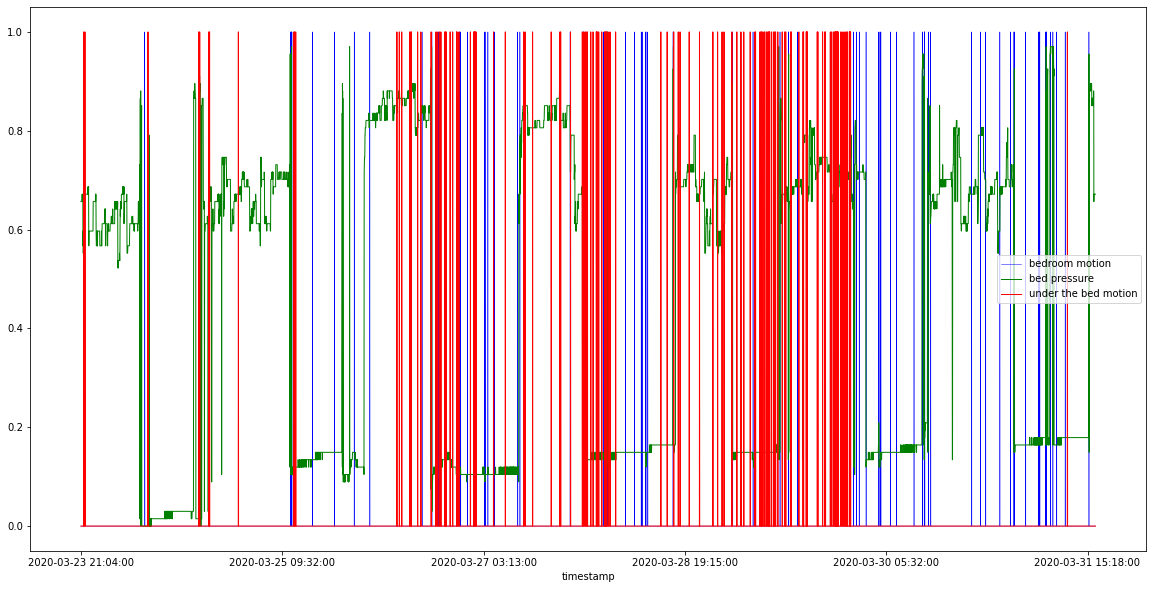

In [34]:
ax2 = df_sleep2.plot(x='timestamp', y='value', color='blue', label='bedroom motion', linewidth='0.5', figsize=(20,10))
normalize(df_3_sleep2).plot(x='timestamp', y='value', color='green', label='bed pressure', linewidth='1', ax=ax2, figsize=(20,10))
normalize(df_bis_sleep2).plot(x='timestamp', y='value', color='red', label='under the bed motion', linewidth='1', ax=ax2, figsize=(20,10))
plt.show()

<AxesSubplot:xlabel='timestamp'>

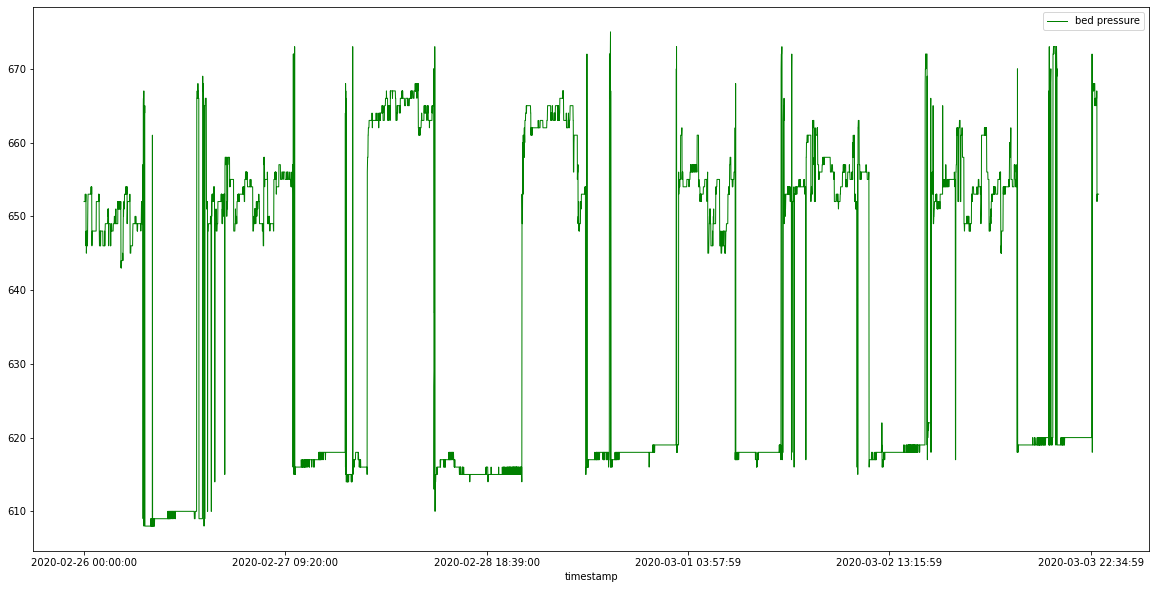

In [35]:
df_3_sleep2.plot(x='timestamp', y='value', color='green', label='bed pressure', linewidth='1', figsize=(20,10))

In [36]:
def get_bed_pressure(df):
    presence_bed = []
    #df = df_3_rgtv
    n = df.shape[0]
    for i in range (n) :
        if (df['value'][i] > 630) and (df['timestamp'][i] < '2020-03-17 23:59:00') :
            #and (df['timestamp'][i] < '2020-03-17 23:59:00') 
            #and (df['timestamp'][i] < '2020-06-01 23:59:00') 
            presence_bed.append(df['timestamp'][i])
    return presence_bed

In [37]:
get_bed_pressure(df_3_sleep)

['2020-02-26 00:00:00',
 '2020-02-26 00:01:00',
 '2020-02-26 00:02:00',
 '2020-02-26 00:02:58',
 '2020-02-26 00:04:00',
 '2020-02-26 00:05:00',
 '2020-02-26 00:06:00',
 '2020-02-26 00:07:00',
 '2020-02-26 00:08:00',
 '2020-02-26 00:09:00',
 '2020-02-26 00:10:00',
 '2020-02-26 00:10:59',
 '2020-02-26 00:12:00',
 '2020-02-26 00:13:00',
 '2020-02-26 00:14:00',
 '2020-02-26 00:15:00',
 '2020-02-26 00:16:00',
 '2020-02-26 00:17:00',
 '2020-02-26 00:18:00',
 '2020-02-26 00:18:59',
 '2020-02-26 00:19:59',
 '2020-02-26 00:20:59',
 '2020-02-26 00:22:00',
 '2020-02-26 00:23:00',
 '2020-02-26 00:24:00',
 '2020-02-26 00:25:00',
 '2020-02-26 00:26:00',
 '2020-02-26 00:27:00',
 '2020-02-26 00:28:00',
 '2020-02-26 00:28:58',
 '2020-02-26 00:30:00',
 '2020-02-26 00:31:00',
 '2020-02-26 00:32:00',
 '2020-02-26 00:33:00',
 '2020-02-26 00:34:00',
 '2020-02-26 00:35:00',
 '2020-02-26 00:36:00',
 '2020-02-26 00:37:00',
 '2020-02-26 00:37:59',
 '2020-02-26 00:38:59',
 '2020-02-26 00:40:00',
 '2020-02-26 00:

In [38]:
def get_plage_sleep(dfa):
    bed_pressure = get_bed_pressure(dfa)
    #dfa = df_3_sleep
    n = len(bed_pressure)
    duree=[]
    debut=[]
    fin=[]
    intermediate=[] #listes de toutes les dates sur une même plage
    plages_bed_pressure=[]
    delta_jour = timedelta(days=1)
    delta_min = timedelta(minutes=1)
    delta_hour = timedelta(hours=1)
    for i in range (n-1):
        if (i!=n) :
            date1 = datetime.strptime(bed_pressure[i], '%Y-%m-%d %H:%M:%S')
            date2 = datetime.strptime(bed_pressure[i+1], '%Y-%m-%d %H:%M:%S')
            if((date1 + delta_min).minute == date2.minute) :
                if(date1.hour == date2.hour) or ((date1 + delta_hour).hour == date2.hour) :
                    if(date1.day == date2.day) or ((date1 + delta_jour).day == date2.day):
                        #Considérer le changement de mois
                        if(date1.month == date2.month):
                            intermediate.append(date1)
                        else:
                            #On vérifie le changement de mois
                            if (date1.day == 29) and (date1.month == 2) :
                                if (date2.day == 1) and (date1.month == 3) :
                                    intermediate.append(date1)
                                else :
                                    if(len(intermediate)!=0):
                                        debut.append(str(intermediate[0]))
                                        fin.append(str(date1))
                                        duree.append(str(date1-intermediate[0]))
                                        intermediate=[]
                            if (date1.day == 30) and (date2.month == 1):
                                intermediate.append(date1)
                            else :
                                if(len(intermediate)!=0):
                                    debut.append(str(intermediate[0]))
                                    fin.append(str(date1))
                                    duree.append(str(date1-intermediate[0]))
                                    itermediate=[]
                            if (date1.day == 31) and (date2.month == 1) :
                                intermediate.append(date1)
                            else :
                                if(len(intermediate)!=0):
                                    debut.append(str(intermediate[0]))
                                    fin.append(str(date1))
                                    duree.append(str(date1-intermediate[0]))
                                    intermediate=[]
            else :
                if(len(intermediate)!=0):
                    debut.append(str(intermediate[0]))
                    fin.append(str(date1))
                    duree.append(str(date1-intermediate[0]))
                    intermediate=[]
                            
    plages_bed_pressure=[debut,fin,duree]
    return plages_bed_pressure

In [39]:
get_plage_sleep(df_3_sleep)

[['2020-02-26 00:00:00',
  '2020-02-26 00:04:00',
  '2020-02-26 00:12:00',
  '2020-02-26 00:18:59',
  '2020-02-26 00:22:00',
  '2020-02-26 00:30:00',
  '2020-02-26 00:37:59',
  '2020-02-26 00:40:00',
  '2020-02-26 00:50:59',
  '2020-02-26 00:53:00',
  '2020-02-26 00:58:00',
  '2020-02-26 01:04:00',
  '2020-02-26 01:07:00',
  '2020-02-26 01:10:00',
  '2020-02-26 01:14:00',
  '2020-02-26 01:23:00',
  '2020-02-26 01:28:00',
  '2020-02-26 01:35:00',
  '2020-02-26 01:41:00',
  '2020-02-26 01:53:00',
  '2020-02-26 02:00:00',
  '2020-02-26 02:06:00',
  '2020-02-26 02:11:00',
  '2020-02-26 02:14:00',
  '2020-02-26 02:19:00',
  '2020-02-26 02:24:00',
  '2020-02-26 02:36:00',
  '2020-02-26 02:58:00',
  '2020-02-26 03:07:00',
  '2020-02-26 03:12:00',
  '2020-02-26 03:35:58',
  '2020-02-26 03:39:00',
  '2020-02-26 04:00:58',
  '2020-02-26 04:05:00',
  '2020-02-26 04:25:00',
  '2020-02-26 04:39:00',
  '2020-02-26 04:43:00',
  '2020-02-26 04:46:00',
  '2020-02-26 04:52:00',
  '2020-02-26 04:57:00',


In [40]:
plages_sleep = pd.DataFrame(columns=['début','fin','durée'])

In [41]:
plages_sleep['début'] = get_plage_sleep(df_3_sleep)[0]
plages_sleep['fin'] = get_plage_sleep(df_3_sleep)[1]
plages_sleep['durée'] = get_plage_sleep(df_3_sleep)[2]

In [42]:
plages_sleep

,début,fin,durée
0,2020-02-26 00:00:00,2020-02-26 00:02:00,0:02:00
1,2020-02-26 00:04:00,2020-02-26 00:10:00,0:06:00
2,2020-02-26 00:12:00,2020-02-26 00:18:00,0:06:00
3,2020-02-26 00:18:59,2020-02-26 00:20:59,0:02:00
4,2020-02-26 00:22:00,2020-02-26 00:28:00,0:06:00
...,...,...,...
2267,2020-03-17 10:54:59,2020-03-17 10:55:59,0:01:00
2268,2020-03-17 10:57:00,2020-03-17 11:00:00,0:03:00
2269,2020-03-17 11:04:00,2020-03-17 11:08:00,0:04:00
2270,2020-03-17 11:10:00,2020-03-17 11:22:00,0:12:00


In [43]:
new_plages_sleep_df = pd.DataFrame(columns=['début','fin','durée'])

def retablir_plages_sleep():
    n = plages_sleep.shape[0]
    new_debut=[]
    new_fin=[]
    fin_intermediate=[]
    new_duree=[]
    
    i=0
    for j in range (n-1):
        date1 = datetime.strptime(plages_sleep.iat[j,1], '%Y-%m-%d %H:%M:%S')
        date2 = datetime.strptime(plages_sleep.iat[j+1,0], '%Y-%m-%d %H:%M:%S')
        calc_intermediate = date2 - date1
        #print(calc_intermediate)
        calc = datetime.strptime(str(calc_intermediate),'%H:%M:%S').minute
        if calc <= 2 :
            #Construire nouveau dataset
            fin_intermediate.append(plages_sleep.iat[j+1,1])
        else :
            if(len(fin_intermediate)!=0) :
                new_debut.append(plages_sleep.iat[i,0])
                new_fin.append(plages_sleep.iat[j,1])
                new_debut_date = datetime.strptime(plages_sleep.iat[i,0],'%Y-%m-%d %H:%M:%S')
                new_fin_date = datetime.strptime(plages_sleep.iat[j,1],'%Y-%m-%d %H:%M:%S')
                calc_duree = new_fin_date-new_debut_date
                new_duree.append(str(calc_duree))
                i=j+1
    new_plages_sleep=[new_debut,new_fin,new_duree]
    return new_plages_sleep

In [44]:
retablir_plages_sleep()

[['2020-02-26 00:00:00',
  '2020-02-26 00:58:00',
  '2020-02-26 01:53:00',
  '2020-02-26 02:00:00',
  '2020-02-26 02:36:00',
  '2020-02-26 02:58:00',
  '2020-02-26 03:12:00',
  '2020-02-26 04:05:00',
  '2020-02-26 04:39:00',
  '2020-02-26 05:56:00',
  '2020-02-26 06:39:59',
  '2020-02-26 07:44:00',
  '2020-02-26 07:50:00',
  '2020-02-26 09:18:00',
  '2020-02-26 09:48:00',
  '2020-02-26 18:42:59',
  '2020-02-26 19:38:00',
  '2020-02-26 20:03:00',
  '2020-02-26 21:08:00',
  '2020-02-26 21:22:00',
  '2020-02-26 21:42:00',
  '2020-02-26 22:12:00',
  '2020-02-26 23:11:00',
  '2020-02-26 23:20:00',
  '2020-02-27 00:04:58',
  '2020-02-27 00:12:00',
  '2020-02-27 00:48:56',
  '2020-02-27 02:04:00',
  '2020-02-27 02:29:00',
  '2020-02-27 03:06:59',
  '2020-02-27 03:41:00',
  '2020-02-27 03:48:00',
  '2020-02-27 04:23:00',
  '2020-02-27 06:34:00',
  '2020-02-27 07:45:00',
  '2020-02-27 07:51:00',
  '2020-02-27 08:17:00',
  '2020-02-27 08:35:00',
  '2020-02-27 08:49:00',
  '2020-02-27 08:59:00',


In [45]:
new_plages_sleep_df['début'] = retablir_plages_sleep()[0]
new_plages_sleep_df['fin'] = retablir_plages_sleep()[1]
new_plages_sleep_df['durée'] = retablir_plages_sleep()[2]

In [46]:
new_plages_sleep_df

,début,fin,durée
0,2020-02-26 00:00:00,2020-02-26 00:54:00,0:54:00
1,2020-02-26 00:58:00,2020-02-26 01:47:00,0:49:00
2,2020-02-26 01:53:00,2020-02-26 01:56:00,0:03:00
3,2020-02-26 02:00:00,2020-02-26 02:30:00,0:30:00
4,2020-02-26 02:36:00,2020-02-26 02:54:00,0:18:00
...,...,...,...
339,2020-03-16 11:55:00,2020-03-16 11:58:00,0:03:00
340,2020-03-17 00:18:00,2020-03-17 00:49:00,0:31:00
341,2020-03-17 00:55:00,2020-03-17 02:59:00,2:04:00
342,2020-03-17 03:03:00,2020-03-17 08:32:59,5:29:59


In [ ]:
#plt.hist(new_plages_sleep_df["durée"])

df_copy=new_plages_sleep_df.copy()

In [73]:
df_copy['durée'] =  pd.to_datetime(df_copy['durée'], format='%H:%M:%S')
df_copy['durée']

0     1900-01-01 00:54:00
1     1900-01-01 00:49:00
2     1900-01-01 00:03:00
3     1900-01-01 00:30:00
4     1900-01-01 00:18:00
              ...        
339   1900-01-01 00:03:00
340   1900-01-01 00:31:00
341   1900-01-01 02:04:00
342   1900-01-01 05:29:59
343   1900-01-01 02:24:00
Name: durée, Length: 344, dtype: datetime64[ns]

In [79]:
#From Abde : à revoir

import plotly.express as px

df = []

for i in range(new_plages_rgtv.shape[0]):
  df.append(dict(Task="Regarder la télé", Start=new_plages_rgtv['début'][i], Finish=new_plages_rgtv['fin'][i]))

for i in range(new_plages_sleep_df.shape[0]):
  df.append(dict(Task="Dormir dans le lit", Start=new_plages_sleep_df['début'][i], Finish=new_plages_sleep_df['début'][i]))

fig = px.timeline(df, x_start='Start', x_end='Finish', y = 'Task', color='Task')
fig.show()

AttributeError: module 'plotly.validators.scatter' has no attribute 'FillpatternValidator'